# Project: Insurance Fraud Detection (DS)
---------------------------------------------



*   **Group Members: Mingtai Dong, Neehar Namjoshi, Areesha Khan**
*   **Group Number: 1**




**Challenge:** You work for Travelers Insurance Company's fraud detection department as a modeler. Your colleagues, who are not familiar with statistics, would like you to create a predictive model based on historical claim data. Your team is concerned about the fraud detection accuracy as well as the key drivers that cause fraudulence.

For this case competition, your group is tasked with identifying first-party physical damage fraudulence and explaining the indicators of fraudulent claims.
  * Make sure you use the 'weighted' F1 score - you can just print this using the classification report (bottom right corner).
    * https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html

# Dataset Description
All first-party physical damage claims will be filtered by claim handlers and some of them will be referred to the fraud detection team. Your data is a sample of these referred claims from 2015 to 2016.

As a simplification, you are just going to work with the train dataset (linked below). This is because it has the answers! All teams will use the same random_seed to split the data into train and test - Dave will do this part for you. You may not delete rows in the test partition, use `transform()` to update rows in test partition, you can do almost anything you want on the train partition. If there is data leakage, you automatically go into last place (more on that later.)

Your work is to build a model on the training data and apply your model to predict the fraud indicator for each claim in the test data.

**Variable Descriptions**
* claim_number - Claim ID **(cannot be used in model)**
* age_of_driver - Age of driver
* gender - Gender of driver
* marital_status - Marital status of driver
* safty_rating - Safety rating index of driver
* annual_income - Annual income of driver
* high_education_ind - Driver’s high education index
* address_change_ind - Whether or not the driver changed living address in past 1 year
* living_status - Driver’s living status, own or rent
* zip_code - Driver’s living address zipcode
* claim_date - Date of first notice of claim
* claim_day_of_week - Day of week of first notice of claim
* accident_site - Accident location, highway, parking lot or local
* past_num_of_claims - Number of claims the driver reported in past 5 years
* witness_present_ind - Witness indicator of the claim
* liab_prct - Liability percentage of the claim
* channel - The channel of purchasing policy
* policy_report_filed_ind - Policy report filed indicator
* claim_est_payout - Estimated claim payout
* age_of_vehicle - Age of first party vehicle
* vehicle_category - Category of first party vehicle
* vehicle_price - Price of first party vehicle
* vehicle_color - Color of first party vehicle
* vehicle_weight - Weight of first party vehicle
* fraud - Fraud indicator (0=no, 1=yes). **This is the response variable.**

In [ ]:
!gdown 1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq

Downloading...
From: https://drive.google.com/uc?id=1a2PQEdhl1-pnx8czvEf8ngpH6sTBRVqq
To: /content/train_2023.csv
100% 2.62M/2.62M [00:00<00:00, 161MB/s]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



df = pd.read_csv('train_2023.csv')
df.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,0,50,F,1.0,66,39117,1,0,Own,50051,...,18,Broker,0,5464.903723,3.0,Large,16786.28845,blue,34183.436390,0
1,1,47,M,1.0,78,38498,1,0,Own,50012,...,81,Broker,0,5448.155974,4.0,Large,20793.29881,black,14528.379730,0
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,95,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.788790,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0


# EDA, data cleaning and feature engineering

# Data Exploration

We will start by exploring our dataset as a whole, visually and by subsetting some columns and rows

In [ ]:
print(df.columns) # Checking all our columns


Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud'],
      dtype='object')


In [ ]:
df.describe() #Checking out our dataset's statistics

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,19000.000000,19000.000000,18996.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,19000.000000,18857.000000,19000.000000,19000.000000,18977.000000,18993.000000,19000.000000,19000.000000,19000.000000
mean,9499.500000,43.605368,0.716625,73.575211,37343.942895,0.696842,0.574000,50020.455211,0.499684,0.236888,49.440158,0.600000,4997.514848,4.994050,23042.319551,23004.473575,0.154632
std,5484.971893,12.042639,0.450649,15.388084,2969.160303,0.459635,0.494507,29179.200999,0.949318,0.425184,33.665171,0.489911,2235.301290,2.246174,11989.010656,12117.439182,0.361563
min,0.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000
25%,4749.750000,35.000000,0.000000,65.000000,35551.000000,0.000000,0.000000,20112.000000,0.000000,0.000000,17.000000,0.000000,3363.778231,3.000000,14243.413855,14109.824760,0.000000
50%,9499.500000,43.000000,1.000000,76.000000,37609.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4669.858508,5.000000,20870.952460,20802.839055,0.000000
75%,14249.250000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80040.000000,1.000000,0.000000,81.000000,1.000000,6275.376268,6.000000,29457.601303,29415.104935,0.000000
max,18999.000000,278.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000


## Relationship Clarification
Before doing any exploration, let's clarify the relationships between variables we think is important.

* *First party Vehicle attributes (age_of_vehicle, vehicle_price)*

In the mechanism of auto insurance, the newer the year and the more expensive the car, the higher the compensation. Accordingly, the insurance premiums for these types of cars are also more expensive. The most of frauding insurer can't afford new luxury cars.

* *First Party Personal Attributes (gender, age_of_driver, marital_status, annual_income, high_education_ind)*

Personal attributes of policyholders can reflect their probability of committing insurance fraud. The annual income is the attribute with the greatest correlation to fraudulent behavior; the higher annual income, the lower the possibility of insurance fraud. Policyholder's age is the second important attribute to predict fraud. In correlation map, 1 unit increase in policyholder's age will decrease the probability of fraud by 6.27%. Also, matrix plot shows a 0.997 correlation between policyholder's age and annual income. It is not suprising, because the annual income of most people tends to increase with their growing work experience.

* *Insurance Policy Attributes (address_change_ind,	past_num_of_claims	witness_present_ind,	liab_prct	policy_report_filed_ind,	claim_est_payout)*

These insurance policy attributes are highly related to the our target variable. This make intuitive sense because insurance company will trace back to these documents once they define fraud.





##Five plots

### 1.Histogram For all Variables
We also use a histogram to visualize the shape of all variables. It will help the data preprocessing in later.

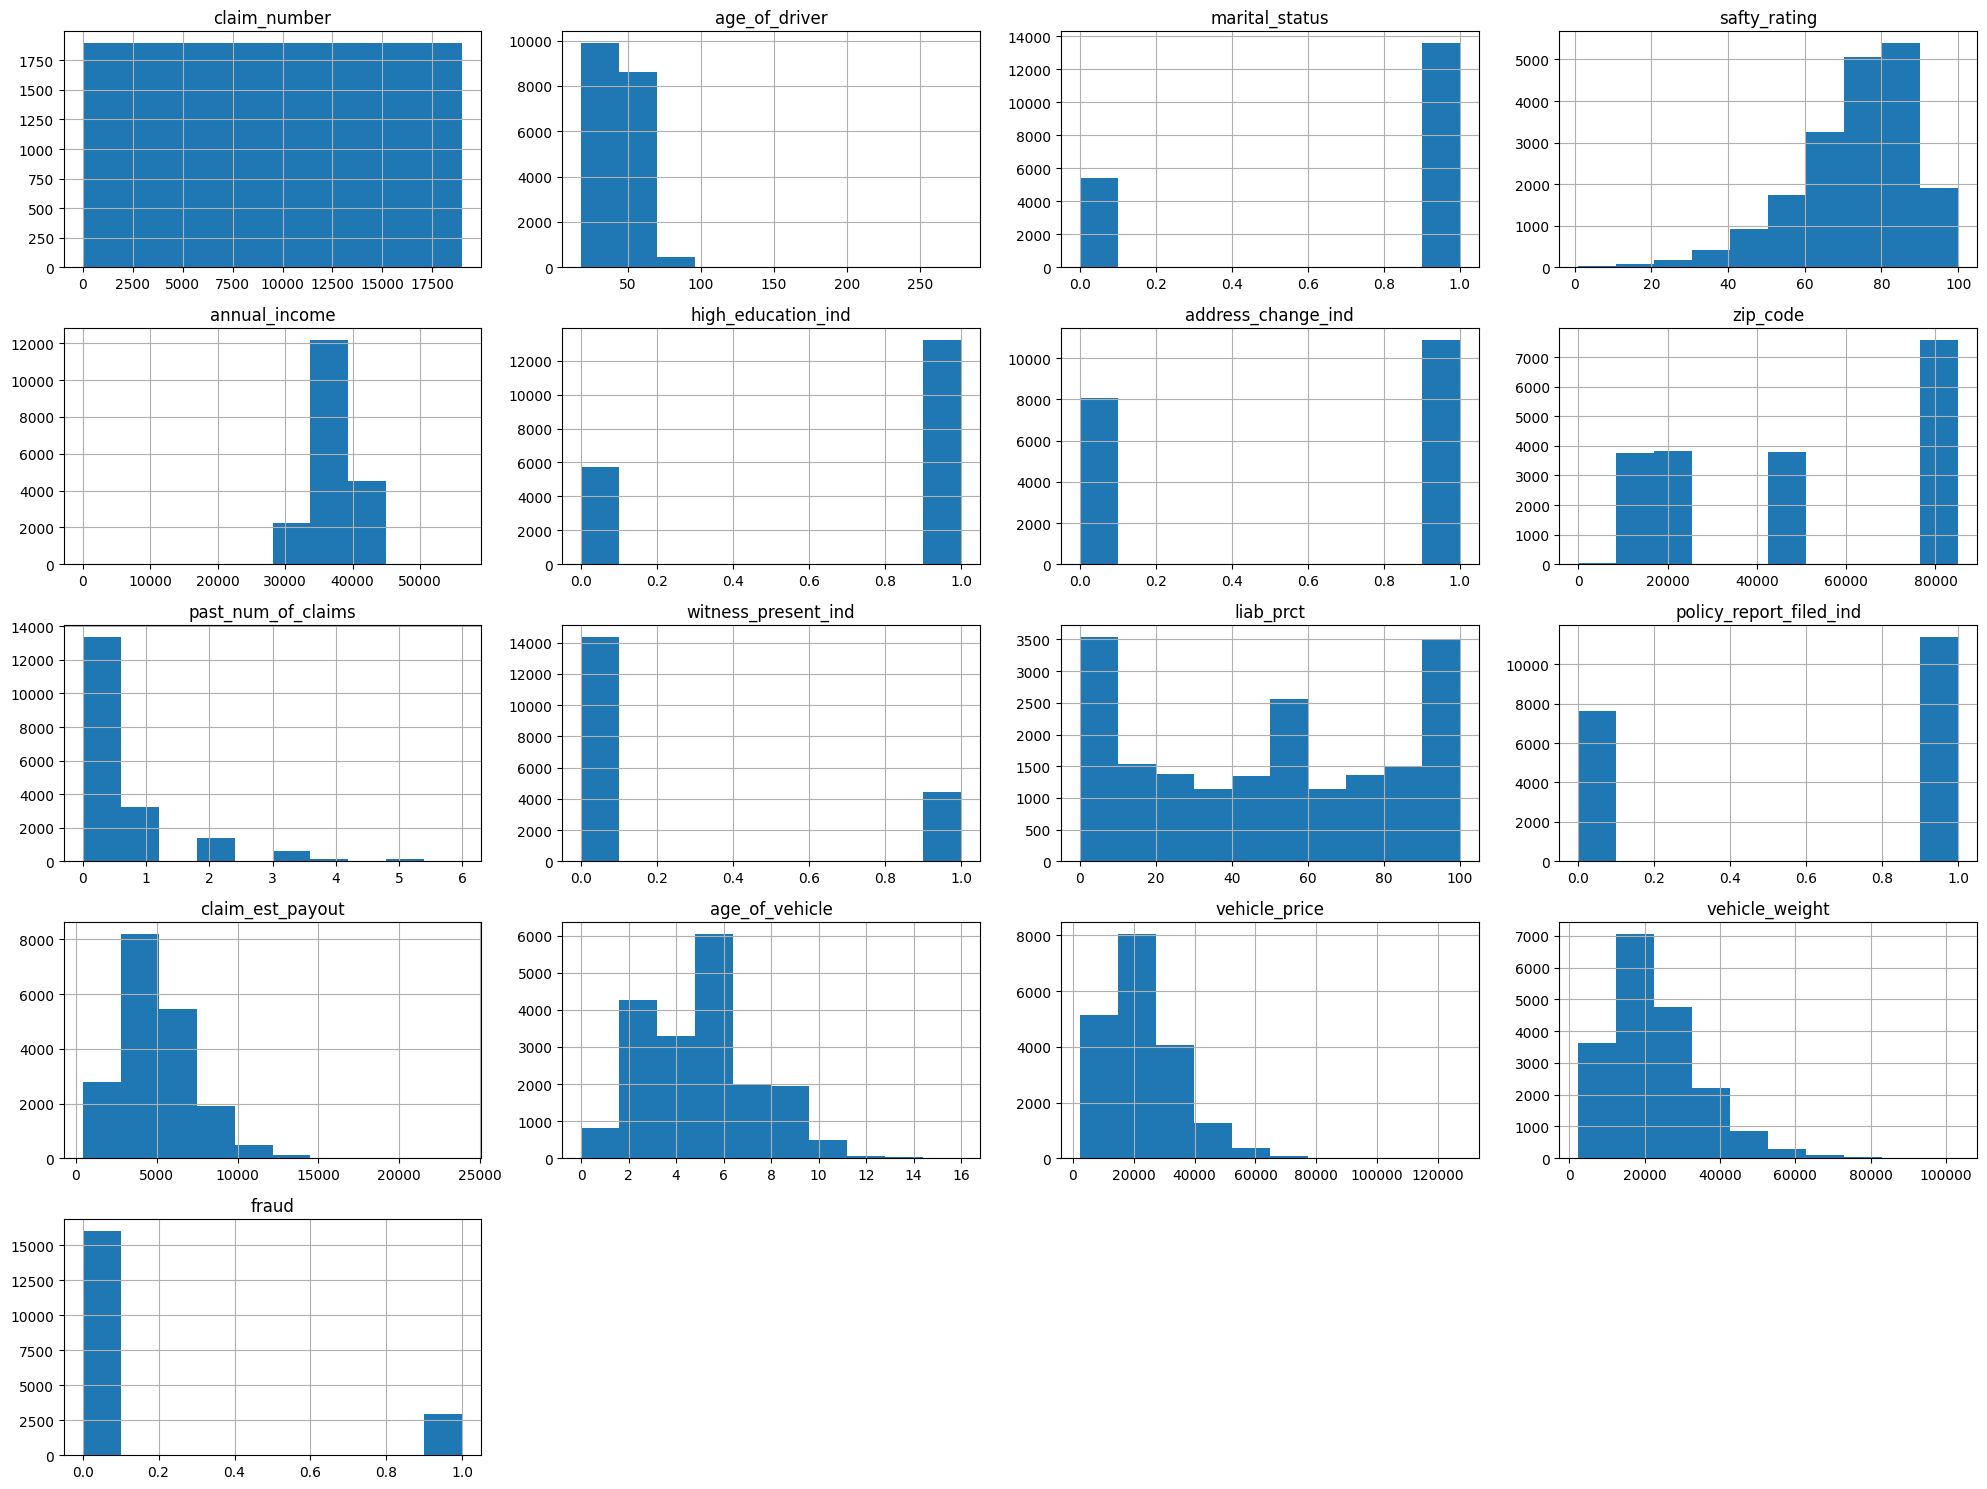

In [ ]:
# Creating a histogram plot for all our variables

df.hist(figsize=(20,15))
plt.tight_layout()
plt.show()

We are interested in several variables: annual_income, witness_present_ind, high_education_ind, past_numb_of_claims, safety rating. Those attributes are highly related to insurance fraud. We will dive into them in the following.

### 2.Warm and Cool Map (df: numerical_df)
By faster identifying the target leakage variable and making intuitive sense about correlation between numeric variables. We create a warm and cool map.  

In [ ]:
df.dtypes #Checking data types

claim_number                 int64
age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
dtype: object

In [ ]:
numerical_df = df.select_dtypes(include=['int64']) #Subsetting all numerical variables
numerical_df.columns

Index(['claim_number', 'age_of_driver', 'safty_rating', 'annual_income',
       'high_education_ind', 'address_change_ind', 'zip_code',
       'past_num_of_claims', 'liab_prct', 'policy_report_filed_ind', 'fraud'],
      dtype='object')

In [ ]:
numerical_df.dtypes #Verifying subsetted the correct columns

claim_number               int64
age_of_driver              int64
safty_rating               int64
annual_income              int64
high_education_ind         int64
address_change_ind         int64
zip_code                   int64
past_num_of_claims         int64
liab_prct                  int64
policy_report_filed_ind    int64
fraud                      int64
dtype: object

In [ ]:
import seaborn as sns
#WE are going to create a warm and cool map for all the numeric variables

corr =numerical_df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

# Annual income and Age of Driver Highly Correlated

,claim_number,age_of_driver,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,liab_prct,policy_report_filed_ind,fraud
claim_number,1.000000,0.005425,0.004000,0.005498,0.008327,0.013048,0.007963,-0.007021,-0.006084,-0.012099,0.004471
age_of_driver,0.005425,1.000000,-0.004806,0.997960,0.008085,0.001929,-0.004690,-0.031939,0.003047,-0.011061,-0.062796
safty_rating,0.004000,-0.004806,1.000000,-0.004613,-0.007799,-0.003749,0.010091,0.000053,0.002909,0.002903,-0.045101
annual_income,0.005498,0.997960,-0.004613,1.000000,0.008658,0.001799,-0.004983,-0.032848,0.003153,-0.010957,-0.062865
high_education_ind,0.008327,0.008085,-0.007799,0.008658,1.000000,0.002834,0.014329,0.015701,-0.004195,0.007012,-0.110637
address_change_ind,0.013048,0.001929,-0.003749,0.001799,0.002834,1.000000,0.004019,0.003186,-0.005624,0.002694,0.067881
zip_code,0.007963,-0.004690,0.010091,-0.004983,0.014329,0.004019,1.000000,-0.001389,-0.001104,-0.004540,-0.006823
past_num_of_claims,-0.007021,-0.031939,0.000053,-0.032848,0.015701,0.003186,-0.001389,1.000000,-0.013313,0.244535,0.091150
liab_prct,-0.006084,0.003047,0.002909,0.003153,-0.004195,-0.005624,-0.001104,-0.013313,1.000000,0.001481,-0.004469
policy_report_filed_ind,-0.012099,-0.011061,0.002903,-0.010957,0.007012,0.002694,-0.004540,0.244535,0.001481,1.000000,0.020860


### 3.Count of Fraud by Accient Site (df: fraud_by_site)
In this barchart, we will visulize what type of accident site are correlated with high fraud.


In [ ]:
#First we create a subset which only contain fraud =1 rows
fraud_by_site = df.loc[df['fraud'] == 1, ['accident_site', 'fraud']]
fraud_by_site['fraud'].describe()

count    2938.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: fraud, dtype: float64

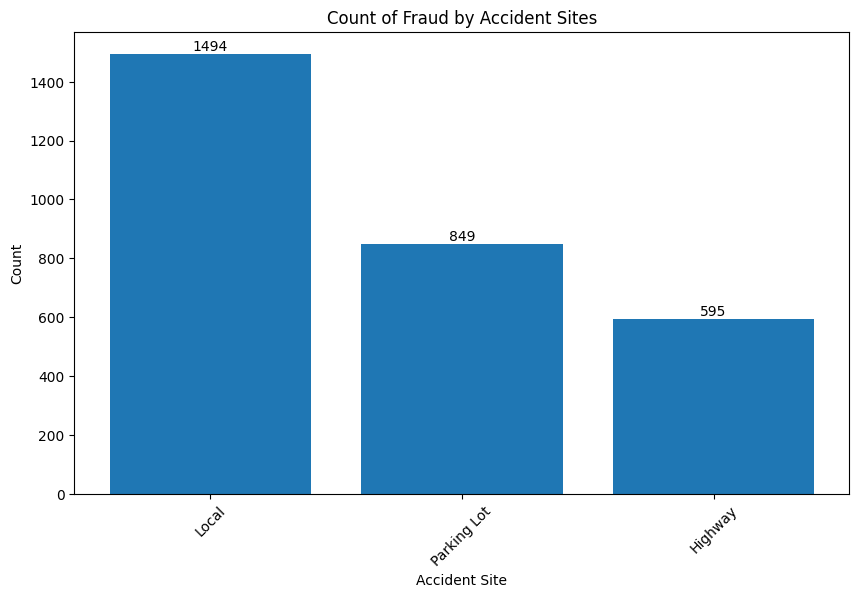

In [ ]:
# Creating the plot
import matplotlib.pyplot as plt

fraud_counts = fraud_by_site['accident_site'].value_counts()

plt.figure(figsize=(10,6))
bars = plt.bar(fraud_counts.index, fraud_counts.values)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

plt.xlabel('Accident Site')
plt.ylabel('Count')
plt.title('Count of Fraud by Accident Sites')
plt.xticks(rotation=45)
plt.show()

Generally we can see that fraud tends to occur in local accident site more than in a parking lot and it occurs more in parking lot as compared to a highway. Something to keep a note of moving forward.

### 4.Policyholder Age & Annual Income VS. Fraud

From the correlation matrix/warm and cool map, we realized a strong correlation between policyholder's age and their annual income. Let's create a scatterplot to visualize the value distribution.

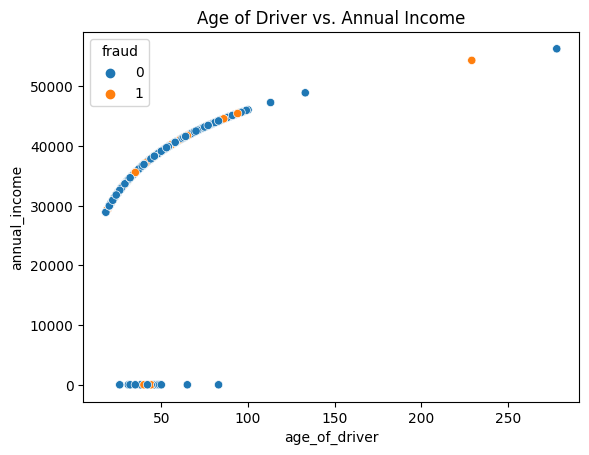

In [ ]:
sns.scatterplot(x=numerical_df['age_of_driver'], y=numerical_df['annual_income'], hue=numerical_df['fraud'], data=numerical_df)
plt.title('Age of Driver vs. Annual Income')
# Display the plot
plt.show()


We can see some outliers in the bottom, but generally we see as age increasing, so does annual income, as expected. Fraud and not fraud is not very evident here, even after overlaying this feature.

### 5.Middle Class Frauds Exploration
The middle class is the largest group in society, so we are interested in how many frauds are from middle class holding annual income, high_education_index, and vehicle_price as a proxy to the middle class. Our Criteria for middle class is as follows:

* annual_income in [25th quantile, 75th quanrile]
* high_Eduaction_ind = 1
* vehicle_price  in [25th quantile, 75th quanrile]


In [ ]:
# Calculate quantiles for annual_income and vehicle_price
income_q1 = df['annual_income'].quantile(0.25)
income_q3 = df['annual_income'].quantile(0.75)
vehicle_price_q1 = df['vehicle_price'].quantile(0.25)
vehicle_price_q3 = df['vehicle_price'].quantile(0.75)


# create a subset of ordinary people
ordinary_people = df[(df['annual_income'] >= income_q1) &
                     (df['annual_income'] <= income_q3) &
                     (df['high_education_ind'] == 1) &
                     (df['vehicle_price'] >= vehicle_price_q1) &
                     (df['vehicle_price'] <= vehicle_price_q3) &
                     (df['fraud'] == 1)]



We want to explore the frequency of how often the middle class upgrade their cars by differentiating between their annual income.

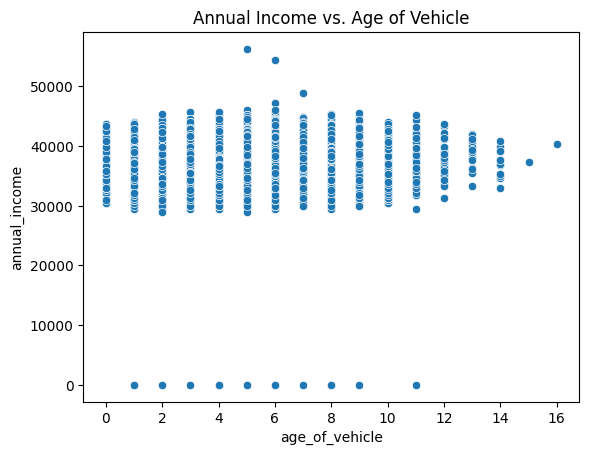

In [ ]:
sns.scatterplot(x=df['age_of_vehicle'], y=df['annual_income'], data=df)
plt.title('Annual Income vs. Age of Vehicle')
plt.show()

It can be seen that as the age of the vehicle increases, the spread of the annual income more or less remains the same. This means that annual income and age of the vehicle are not proportionally related, rather there is a constant term relation between the two.

## Five Tables

### 1.How Many Wealthy People are Committing Insurance Fraud?
In order to identify the relationship between the social group and our target variable fraud. We split the data into three social classes by filtering annual_income, high_Eduaction_ind, and vehicle_price. The result from this series of exploration will help us understand the data better.

The criteria for wealthy people/upper class is as follows:

* annual_income larger than or equal to 75th quantile
* high_Eduaction_ind = 1
* vehicle_price larger than or equal to 75th quantile



In [ ]:
# create a subset of wealthy people
wealthy_people = df[ (df['annual_income'] >= income_q3) &
                     (df['high_education_ind'] == 1) &
                     (df['vehicle_price'] >= vehicle_price_q3) &
                     (df['fraud'] == 1)]

wealthy_people.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
263,263,54,M,1.0,86,39880,1,0,Own,50047,...,50,Broker,0,6607.548292,7.0,Large,47947.92243,gray,10328.370900,1
882,882,64,F,1.0,87,41585,1,1,Own,50054,...,50,Online,0,3677.731135,4.0,Medium,30698.11721,other,19612.726130,1
1181,1181,62,F,0.0,67,41277,1,0,Own,85019,...,49,Phone,0,5443.130779,2.0,Compact,49720.01497,white,21825.779360,1
1392,1392,51,F,1.0,83,39321,1,0,Rent,15059,...,69,Broker,0,4888.117043,4.0,Large,37496.22176,black,20257.212220,1
1494,1494,55,F,1.0,82,40080,1,0,Rent,85021,...,9,Online,0,9525.653458,11.0,Medium,49843.95603,silver,6689.886628,1


In [ ]:
print(f"Percentage of Wealthy people committing insurance fraud: {wealthy_people['fraud'].count()/ df['fraud'].count()}")

Percentage of Wealthy people committing insurance fraud: 0.0038947368421052633


Wealthy or upper class seems to commit fraud 0.3% of the time. This is a very small number, so this is definitely not our target group, which intuitively makes sense as well. A rich person is generally content with their wealth so do not try to make quick cash by committing fraud.

### 2.How many Low-Income People are Committing Insurance Fraud?
Now we are interested in the proportion of low income people who are committing fraud. The Criteria for low income people is as follows:
* annual_income less than or equal to 25th quantile
* high_Eduaction_ind = 0
* vehicle_price less than or equal to 25th quantile

In [ ]:
# create a subset of low income people
low_income_people = df[ (df['annual_income'] <= income_q1) &
                     (df['high_education_ind'] == 0) &
                     (df['vehicle_price'] <= vehicle_price_q1) &
                     (df['fraud'] == 1)]

low_income_people.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
515,515,32,F,0.0,93,34665,0,1,Rent,80103,...,35,Phone,0,7692.187298,5.0,Medium,8596.900032,other,14544.36730,1
560,560,26,M,1.0,49,32573,0,1,Rent,20155,...,4,Online,0,691.105865,5.0,Large,12235.834040,silver,25451.33558,1
571,571,34,F,1.0,46,35261,0,1,Own,15010,...,94,Online,1,6761.803186,11.0,Medium,9018.884473,blue,22045.40704,1
998,998,20,F,0.0,73,29949,0,1,Rent,85073,...,45,Broker,1,2831.181827,9.0,Large,14178.273590,gray,14858.66774,1
1305,1305,24,F,0.0,63,31807,0,0,Rent,85079,...,90,Broker,0,6985.108669,3.0,Large,12829.035020,black,28077.35567,1


In [ ]:
low_income_people.count()

claim_number               85
age_of_driver              85
gender                     85
marital_status             85
safty_rating               85
annual_income              85
high_education_ind         85
address_change_ind         85
living_status              85
zip_code                   85
claim_date                 85
claim_day_of_week          85
accident_site              85
past_num_of_claims         85
witness_present_ind        83
liab_prct                  85
channel                    85
policy_report_filed_ind    85
claim_est_payout           85
age_of_vehicle             85
vehicle_category           85
vehicle_price              85
vehicle_color              85
vehicle_weight             85
fraud                      85
dtype: int64

In [ ]:
print(f"Percentage of low income people committing insurance fraud: {low_income_people['fraud'].count()/ df['fraud'].count()}")

Percentage of low income people committing insurance fraud: 0.0044736842105263155


Low income individuals also are not committing fraud, as can be seen from the exploration above. As only 0.04% of the population can be seen committing fraud.

### In Conclusion
Now, we have a reasonable result from our data exploration. *The most of people who committing insurance fraud are come from middle class.*

This result makes us more curious to factors which drive middle class people committing insurance fraud. We are digging into this in the following.


### Driver of Middle Class Committing Fraud Investigation: insufficient fund for car upgrade
In the previous plot, we are visualize the potential driver: insufficient fund for car upgrade. People who has the car upgrade need are defined as

* age_of_vehicle >= 75th quantile

* vehicle_price <= median


In [ ]:
vehicle_age_q3 = df['age_of_vehicle'].quantile(0.75)
vehicle_price_median = df['vehicle_price'].quantile(0.5)

#Define the middle class people who have need of insufficient fund for car upgrade
need1 = df[ (ordinary_people['age_of_vehicle'] >= vehicle_age_q3) &
                     (df['vehicle_price'] <= vehicle_price_median) &
                     (df['fraud'] == 1)]
need1.count()

claim_number               104
age_of_driver              104
gender                     104
marital_status             104
safty_rating               104
annual_income              104
high_education_ind         104
address_change_ind         104
living_status              104
zip_code                   104
claim_date                 104
claim_day_of_week          104
accident_site              104
past_num_of_claims         104
witness_present_ind        104
liab_prct                  104
channel                    104
policy_report_filed_ind    104
claim_est_payout           104
age_of_vehicle             104
vehicle_category           104
vehicle_price              104
vehicle_color              104
vehicle_weight             104
fraud                      104
dtype: int64

In [ ]:
print(f"Percentage of middle class people who has insufficient fund for car upgrade situation: {ordinary_people['fraud'].count()/ df['fraud'].count()}")

Percentage of middle class people who has insufficient fund for car upgrade situation: 0.025947368421052632


There are 17.35% of middle class fraud facing the insufficient fund for car upgrade situation. It can be one of the reason why middle class people are committing insurance fraud.

### 3.Fraud By Address_change_ind
In the previous exploration, we found there are high correlation between fraud and address_change_ind.

We speculate that the suspects planning to commit insurance fraud will change their address a month before the fraudulent incident occurs."

Let's use group by function to find out!

In [ ]:
fraud_feature1 = df[df['address_change_ind'] == 1]

fraud_feature1.head()


,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
2,2,28,M,0.0,76,33343,0,1,Rent,20158,...,94,Broker,1,1858.971699,4.0,Compact,6729.47649,blue,7182.832636,0
4,4,60,F,1.0,79,40948,1,1,Rent,80010,...,53,Phone,1,4876.606138,6.0,Medium,17392.41997,black,7546.494014,0
5,5,50,F,1.0,92,39126,1,1,Own,50047,...,41,Broker,0,4468.933539,8.0,Compact,15891.70097,silver,52379.710450,0
6,6,28,M,1.0,89,33327,1,1,Own,85035,...,50,Broker,1,7656.884210,5.0,Compact,35462.72316,black,21971.624120,0
8,8,65,F,1.0,91,41746,1,1,Rent,15043,...,17,Online,0,3795.643318,5.0,Large,19468.99031,red,18237.078180,0


In [ ]:
print(f"Percentage of Fraud Who Changed Address in Last One Month: {fraud_feature1['fraud'].count()/ df['fraud'].count()}")

Percentage of Fraud Who Changed Address in Last One Month: 0.574


There are 57.4% fraud people changed their living address in one month before fraudation accident

### 4.Accidents In Winter
Consider time is a important variable which is highly related to accident possibility. In general, accident are more frequent happen in Winter days than other seasons on snowy palces. This dataset is a combination of automobile accident reports from Traveler, so we are assuming that all the accident sites are in the connecticut and surrounding areas.

To increase classification accuracy, we are going to create a flag variable: 1 for winter and 0 for other season.

In [ ]:
#First, we are checking the format of claim_date
df['claim_date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 19000 entries, 0 to 18999
Series name: claim_date
Non-Null Count  Dtype 
--------------  ----- 
19000 non-null  object
dtypes: object(1)
memory usage: 148.6+ KB


In [ ]:
#We explore the claim date range: It's from 1/1/2015 to 9/9/2016
df['claim_date'].min()
df['claim_date'].max()

'9/9/2016'

In [ ]:
import pandas as pd

#Flag Variable FLAG_Snowtime Creation
df['claim_date'] = pd.to_datetime(df['claim_date'], format='%m/%d/%Y')

def set_winter_flag(row):
    if ((row['claim_date'] >= pd.Timestamp('2015-01-01') and row['claim_date'] <= pd.Timestamp('2015-03-01')) or
        (row['claim_date'] >= pd.Timestamp('2015-12-01') and row['claim_date'] <= pd.Timestamp('2016-03-01'))):
        return 1
    else:
        return 0

df['FLAG_Winter'] = df.apply(set_winter_flag, axis=1)

In [ ]:
# we want to know how many accidents are happen in winter among all 18584 records
df.groupby('FLAG_Winter').describe()

claim_number                                                  \
                   count         mean          std  min      25%     50%   
FLAG_Winter                                                                
0                15006.0  9503.907704  5475.794505  3.0  4764.25  9507.5   
1                 3994.0  9482.939659  5519.973552  0.0  4707.00  9464.5   

                               age_of_driver             ... vehicle_weight  \
                  75%      max         count       mean  ...            75%   
FLAG_Winter                                              ...                  
0            14243.75  18998.0       15006.0  43.600960  ...   29565.325877   
1            14264.50  18999.0        3994.0  43.621933  ...   28920.540130   

                             fraud                                          \
                      max    count      mean       std  min  25%  50%  75%   
FLAG_Winter                                                                  
0            103192.72370  15006.0  0.154272  0.361221  0.0  0.0  0.0  0.0   
1             95889.81896   3994.0  0.155984  0.362886  0.0  0.0  0.0  0.0   

                  
             max  
FLAG_Winter       
0            1.0  
1            1.0  

[2 rows x 136 columns]

In [ ]:
fraud_feature2 = df[df['FLAG_Winter'] == 1]

In [ ]:
print(f"Percentage of Fraud which accident happen in winter: {fraud_feature2['fraud'].count()/ df['fraud'].count()}")

Percentage of Fraud which accident happen in winter: 0.2102105263157895


### 5.Safety Rating Exploration


In [ ]:
df['safty_rating'].describe()
#Now we know the extreme low outliers are customers whose rating under 65 out of 100.

dangerous_driver = df[df['safty_rating'] < 65]
dangerous_driver.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud,FLAG_Winter
3,3,36,M,1.0,56,35832,1,0,Own,50054,...,Phone,0,4040.932844,5.0,Compact,24914.26785,gray,47891.78879,0,0
10,10,34,F,0.0,61,35273,0,1,Own,15025,...,Phone,1,6664.526074,6.0,Compact,18105.99322,gray,52983.26926,0,0
11,11,42,F,1.0,40,37375,0,0,Own,80003,...,Broker,1,4075.462721,11.0,Compact,15441.62367,silver,10341.85651,0,0
13,13,38,F,1.0,55,36383,0,1,Own,15032,...,Broker,1,4316.267436,6.0,Large,24823.20394,white,21784.52567,0,0
20,20,46,M,1.0,51,38289,0,1,Rent,85077,...,Phone,1,3291.280834,6.0,Large,13988.67273,white,17776.49932,0,1


In [ ]:
fraud_feature3 = df[df['safty_rating'] < 65]
print(f"Percentage of Fraud Customer whose safty rating below 65: {fraud_feature3['fraud'].count()/ df['fraud'].count()}")


Percentage of Fraud Customer whose safty rating below 65: 0.23389473684210527


In [ ]:
print(df.columns)

Index(['claim_number', 'age_of_driver', 'gender', 'marital_status',
       'safty_rating', 'annual_income', 'high_education_ind',
       'address_change_ind', 'living_status', 'zip_code', 'claim_date',
       'claim_day_of_week', 'accident_site', 'past_num_of_claims',
       'witness_present_ind', 'liab_prct', 'channel',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_category', 'vehicle_price', 'vehicle_color', 'vehicle_weight',
       'fraud', 'FLAG_Winter'],
      dtype='object')


# Data Cleaning & Creation

Now that we have explored the dataset, we will first split into train and test, such that no data leakage occurs.

In [ ]:
# hint: do you have imbalanced data?
df['fraud'].value_counts() # yes you do!

0    16062
1     2938
Name: fraud, dtype: int64

In [ ]:
# split the data (don't change this!)

# Additionall dropping columns that we will not be using in our analysis.

X = df.drop(['claim_number', 'fraud', 'zip_code', 'claim_date'],axis=1) # Dropped Claim number, fraud, zip code, and claim date.
y = df['fraud']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [ ]:
# check the shapes
print(df.shape)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(19000, 26)
(15200, 22) (15200,)
(3800, 22) (3800,)


## Creating of Flag Variables and Dummy Variables

We will start by creating flag variables and dummy variables for our data as well as drop some columns that we will not be using in our analysis.

In [ ]:
pd.set_option('display.max_columns', None)
X_train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,FLAG_Winter
6787,46,F,1.0,50,38294,1,0,Rent,Saturday,Parking Lot,0,0.0,34,Broker,1,6420.369419,5.0,Large,12421.420480,gray,15723.35207,0
6097,35,M,1.0,77,35552,0,0,Own,Friday,Highway,2,0.0,32,Phone,1,3338.619246,1.0,Medium,22673.455310,red,15473.53232,1
11219,63,M,1.0,86,41432,0,1,Own,Monday,Local,0,0.0,50,Phone,0,2784.762551,3.0,Compact,9208.723797,blue,25495.82584,1
2512,47,M,1.0,81,38502,1,0,Rent,Sunday,Parking Lot,0,1.0,50,Broker,0,4481.845804,4.0,Large,28051.151580,gray,35830.51049,0
4279,37,M,1.0,82,36102,0,0,Rent,Wednesday,Local,2,1.0,76,Broker,1,4782.534213,8.0,Compact,38076.954140,white,41352.84911,0


In [ ]:
# Creating Flag Variables for X_train

# Gender Flag Variable (Female = 1, Male = 0)
X_train['gender'] = np.where(X_train['gender'] == 'F', 1, 0)

X_train['gender'].value_counts()

0    7953
1    7247
Name: gender, dtype: int64

In [ ]:
X_train['living_status'].unique()

array(['Rent', 'Own'], dtype=object)

In [ ]:
# Creating Flag Variables for X_train

# living status Flag Variable (Own = 1, Rent = 0)

X_train['living_status'] = np.where(X_train['living_status'] == 'Own', 1, 0)

X_train['living_status'].value_counts()

1    8413
0    6787
Name: living_status, dtype: int64

In [ ]:
X_train['claim_day_of_week'].unique()

array(['Saturday', 'Friday', 'Monday', 'Sunday', 'Wednesday', 'Tuesday',
       'Thursday'], dtype=object)

In [ ]:
# Creating dummy variables for all categorical variables that cannot be flagged, ie. have more than 2 categories
tmp1 = pd.concat([pd.get_dummies(X_train['claim_day_of_week']), pd.get_dummies(X_train['accident_site']), pd.get_dummies(X_train['channel']), pd.get_dummies(X_train['vehicle_category']), pd.get_dummies(X_train['vehicle_color'])], axis = 1)
tmp1.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Highway,Local,Parking Lot,Broker,Online,Phone,Compact,Large,Medium,black,blue,gray,other,red,silver,white
6787,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
6097,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
11219,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0
2512,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0
4279,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
# You need only n-1 dummy variables for each category, so dropping 1 from each arbitrarily
tmp1 = tmp1.drop(['Sunday'], axis = 1)
tmp1 = tmp1.drop(['Local'], axis = 1)
tmp1 = tmp1.drop(['Broker'], axis = 1)
tmp1 = tmp1.drop(['Compact'], axis = 1)
tmp1 = tmp1.drop(['other'], axis = 1)

In [ ]:
X_train = pd.concat([X_train, tmp1], axis=1) # Concatenating the original dataframe with the dummy variables dataframe

In [ ]:
X_train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
6787,46,1,1.0,50,38294,1,0,0,Saturday,Parking Lot,0,0.0,34,Broker,1,6420.369419,5.0,Large,12421.420480,gray,15723.35207,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
6097,35,0,1.0,77,35552,0,0,1,Friday,Highway,2,0.0,32,Phone,1,3338.619246,1.0,Medium,22673.455310,red,15473.53232,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
11219,63,0,1.0,86,41432,0,1,1,Monday,Local,0,0.0,50,Phone,0,2784.762551,3.0,Compact,9208.723797,blue,25495.82584,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2512,47,0,1.0,81,38502,1,0,0,Sunday,Parking Lot,0,1.0,50,Broker,0,4481.845804,4.0,Large,28051.151580,gray,35830.51049,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4279,37,0,1.0,82,36102,0,0,0,Wednesday,Local,2,1.0,76,Broker,1,4782.534213,8.0,Compact,38076.954140,white,41352.84911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Dropping all the categorical columns for which dummy variables were made

X_train = X_train.drop(['claim_day_of_week'], axis = 1)
X_train = X_train.drop(['accident_site'], axis = 1)
X_train = X_train.drop(['channel'], axis = 1)
X_train = X_train.drop(['vehicle_category'], axis = 1)
X_train = X_train.drop(['vehicle_color'], axis = 1)



In [ ]:
X_train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
6787,46,1,1.0,50,38294,1,0,0,0,0.0,34,1,6420.369419,5.0,12421.420480,15723.35207,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
6097,35,0,1.0,77,35552,0,0,1,2,0.0,32,1,3338.619246,1.0,22673.455310,15473.53232,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
11219,63,0,1.0,86,41432,0,1,1,0,0.0,50,0,2784.762551,3.0,9208.723797,25495.82584,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2512,47,0,1.0,81,38502,1,0,0,0,1.0,50,0,4481.845804,4.0,28051.151580,35830.51049,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4279,37,0,1.0,82,36102,0,0,0,2,1.0,76,1,4782.534213,8.0,38076.954140,41352.84911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


Above, we check the flag and dummy variables that we have created for analysis purposes. Moving on, now we need to check for missing values and impute them for training and transform() these values onto the test partition.

## Missing Values (Imputing with KNNImputer)

In [ ]:
X_train.isna().sum() # Finding missing values

age_of_driver                0
gender                       0
marital_status               4
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
past_num_of_claims           0
witness_present_ind        113
liab_prct                    0
policy_report_filed_ind      0
claim_est_payout            18
age_of_vehicle               6
vehicle_price                0
vehicle_weight               0
FLAG_Winter                  0
Friday                       0
Monday                       0
Saturday                     0
Thursday                     0
Tuesday                      0
Wednesday                    0
Highway                      0
Parking Lot                  0
Online                       0
Phone                        0
Large                        0
Medium                       0
black                        0
blue                         0
gray                         0
red     

In [ ]:
tmp2 = pd.DataFrame(X_train, columns= X_train.columns) # Creating a dummy dataframe to preserve column names and index

In [ ]:
tmp2.head() # Making sure it is good!

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
6787,46,1,1.0,50,38294,1,0,0,0,0.0,34,1,6420.369419,5.0,12421.420480,15723.35207,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
6097,35,0,1.0,77,35552,0,0,1,2,0.0,32,1,3338.619246,1.0,22673.455310,15473.53232,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0
11219,63,0,1.0,86,41432,0,1,1,0,0.0,50,0,2784.762551,3.0,9208.723797,25495.82584,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
2512,47,0,1.0,81,38502,1,0,0,0,1.0,50,0,4481.845804,4.0,28051.151580,35830.51049,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
4279,37,0,1.0,82,36102,0,0,0,2,1.0,76,1,4782.534213,8.0,38076.954140,41352.84911,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Imputing all values using KNN Imputer
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
X_train = imputer.fit_transform(X_train)
type(X_train)

numpy.ndarray

In [ ]:
# Converting our data from numpy.ndarray back to pandas.dataframe from tmp2 dataframe created earlier
X_train = pd.DataFrame(X_train, columns=tmp2.columns, index=tmp2.index)

In [ ]:
X_train.head() # Matches index and column names

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
6787,46.0,1.0,1.0,50.0,38294.0,1.0,0.0,0.0,0.0,0.0,34.0,1.0,6420.369419,5.0,12421.420480,15723.35207,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6097,35.0,0.0,1.0,77.0,35552.0,0.0,0.0,1.0,2.0,0.0,32.0,1.0,3338.619246,1.0,22673.455310,15473.53232,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
11219,63.0,0.0,1.0,86.0,41432.0,0.0,1.0,1.0,0.0,0.0,50.0,0.0,2784.762551,3.0,9208.723797,25495.82584,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2512,47.0,0.0,1.0,81.0,38502.0,1.0,0.0,0.0,0.0,1.0,50.0,0.0,4481.845804,4.0,28051.151580,35830.51049,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4279,37.0,0.0,1.0,82.0,36102.0,0.0,0.0,0.0,2.0,1.0,76.0,1.0,4782.534213,8.0,38076.954140,41352.84911,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
X_train.isna().sum().sum() # Verify that the train dataset has no missing values!

0

## Taking care of outliers

Now that we no longer have any missing values, we will have to check for and recode the outliers, so that our model can learn the data and pattern better.

In [ ]:
X_train.describe() # Looking at the data and identifying outliers and quantiles

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.577368,0.476776,0.717500,73.470395,37331.196184,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,23002.479416,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,12.115236,0.499477,0.450189,15.472854,2996.757118,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,12011.181530,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29440.089263,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,278.000000,1.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Age of Driver

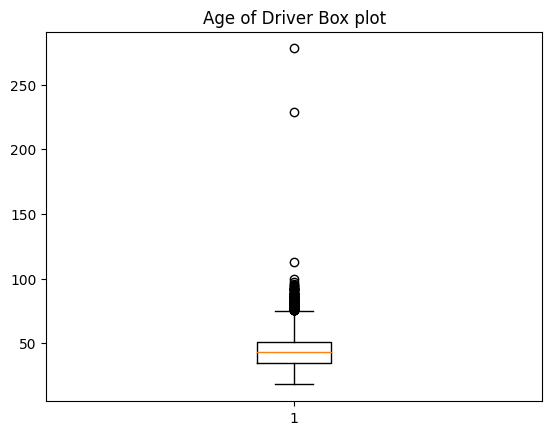

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.boxplot(X_train['age_of_driver'])
plt.title('Age of Driver Box plot')
plt.show()
plt.show()
# Clearly there are outliers for age of driver column in the dataset

In [ ]:
# https://assileye.com/blog/eye-health-and-elderly-driving/#:~:text=According%20to%20AARP%2C%20the%20average,to%20hand%20over%20the%20keys
# Based on the article above, all values greater than 75 have to be 75.

X_train['age_of_driver'] = np.where(X_train['age_of_driver'] >= 75,75,X_train['age_of_driver'])

# Recoding all outliers to the 75th percentile of the train data.

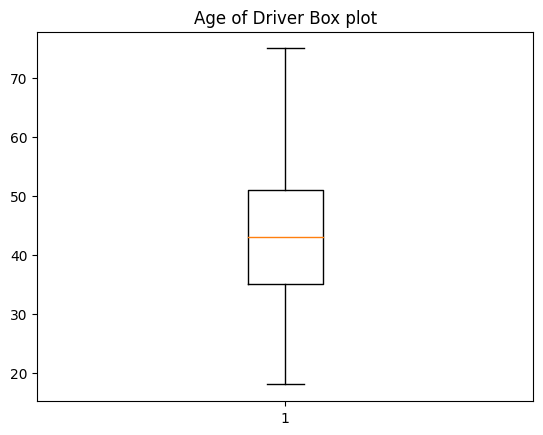

In [ ]:
plt.boxplot(X_train['age_of_driver'])
plt.title('Age of Driver Box plot')
plt.show()
# No outliers seen anymore

In [ ]:
X_train.describe() # Recoding has worked!

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37331.196184,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,23002.479416,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,2996.757118,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,12011.181530,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29440.089263,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Annual Income

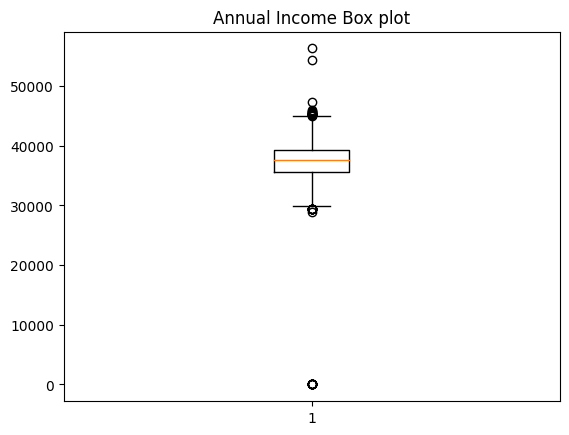

In [ ]:
plt.boxplot(X_train['annual_income'])
plt.title('Annual Income Box plot')
plt.show()
# Clearly there are outliers for annual_income column in the dataset

In [ ]:
X_train.describe()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37331.196184,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,23002.479416,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,2996.757118,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,12011.181530,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29440.089263,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,56275.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Taking care of Annual Income Outliers
X_train['annual_income'] = np.where(X_train['annual_income'] >= 39317,39317,X_train['annual_income'])
X_train['annual_income'] = np.where(X_train['annual_income'] <= 35550,35550,X_train['annual_income'])
# Recoded higher end outliers to 75th percnetile and lower end outliers to 25th percnetile of the train data

In [ ]:
X_train.describe() # Looks good!

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37472.837434,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,23002.479416,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,1530.850553,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,12011.181530,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29440.089263,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,39317.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### claim_est_payout

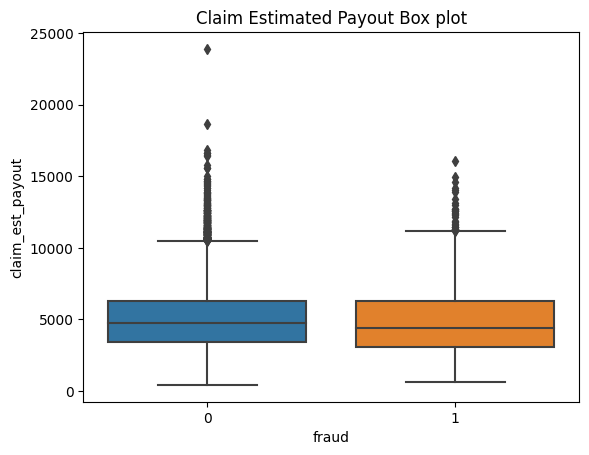

In [ ]:
sns.boxplot(y = X_train['claim_est_payout'],x = y_train)
plt.title('Claim Estimated Payout Box plot')
plt.show()
# Choosing to leave these outliers as the estimated payout amount will definitely bring more insight and will be data that our model has to capture!

In [ ]:
X_train.describe()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37472.837434,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,23002.479416,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,1530.850553,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,12011.181530,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29440.089263,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,39317.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### age_of_vehicle

In [ ]:
X_train.describe()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37472.837434,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,23002.479416,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,1530.850553,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,12011.181530,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29440.089263,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,39317.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


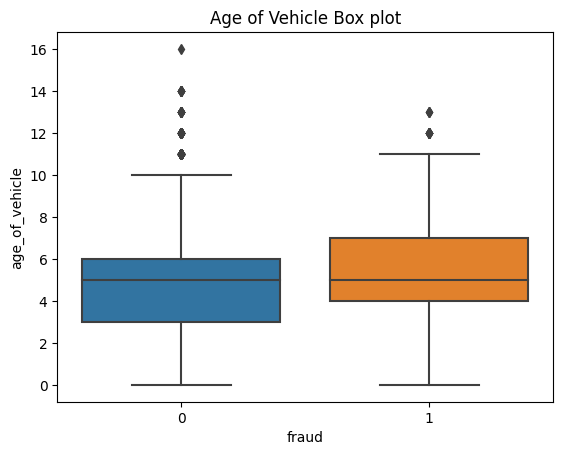

In [ ]:
sns.boxplot(y = X_train['age_of_vehicle'],x = y_train)
plt.title('Age of Vehicle Box plot')
plt.show()
# These outliers make sense, there are not many older cars either, so will be choosing to leave them as is.

In [ ]:
X_train.describe()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37472.837434,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,23002.479416,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,1530.850553,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,12011.181530,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29440.089263,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,39317.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,127063.506000,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### vehicle_price

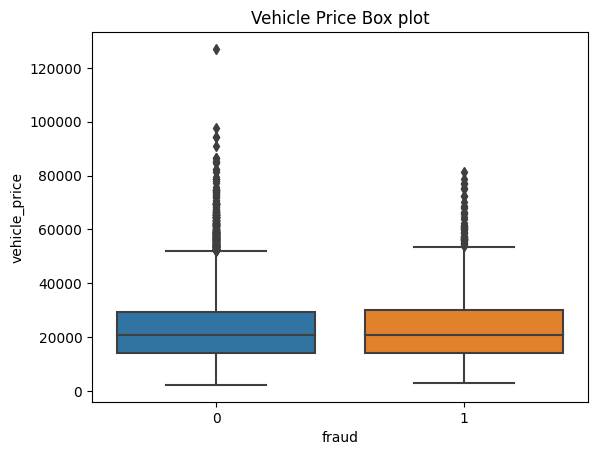

In [ ]:
sns.boxplot(y = X_train['vehicle_price'],x = y_train)
plt.title('Vehicle Price Box plot')
plt.show()

In [ ]:
# Recoding outliers for Vehicle Price
X_train['vehicle_price'] = np.where(X_train['vehicle_price'] >= 29440.089263,29440.089263,X_train['vehicle_price'])
# Dense and many outliers on the upper end, therefore recoding it to the 75th percentile.

In [ ]:
X_train.describe()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37472.837434,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,20474.641977,23013.770794,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,1530.850553,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,7562.149170,12105.526639,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29439.748693,29442.240695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,39317.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,29440.089263,103192.723700,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### vehicle_weight

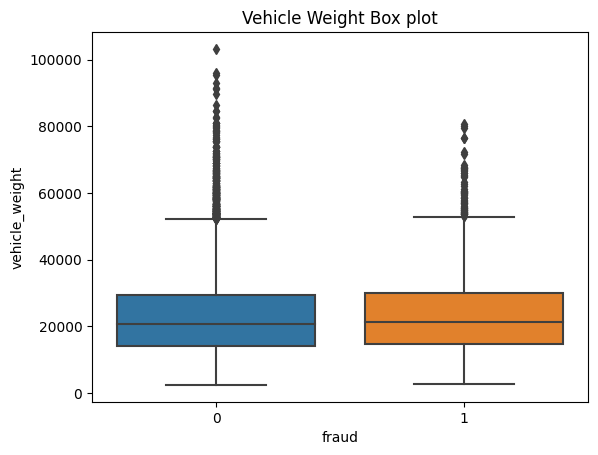

In [ ]:
sns.boxplot(y = X_train['vehicle_weight'],x = y_train)
plt.title('Vehicle Weight Box plot')
plt.show()

In [ ]:
# Recoding outliers for Vehicle Weight
X_train['vehicle_weight'] = np.where(X_train['vehicle_weight'] >= 29442.240695,29442.240695,X_train['vehicle_weight'])
# Dense and many outliers on the upper end, therefore recoding it to the 75th percentile. Also since we altered vehicle price, vehicle weight should also be recoded accordingly.

In [ ]:
X_train.describe()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
count,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000,15200.000000
mean,43.481513,0.476776,0.717500,73.470395,37472.837434,0.699211,0.571579,0.553487,0.499408,0.236303,49.421842,0.599342,4995.223365,5.012053,20474.641977,20450.296350,0.212368,0.137566,0.144539,0.140855,0.147500,0.143355,0.140789,0.209145,0.299737,0.145461,0.317829,0.334013,0.328355,0.145789,0.140855,0.142895,0.142566,0.143618,0.143289
std,11.645646,0.499477,0.450189,15.472854,1530.850553,0.458616,0.494866,0.497147,0.948853,0.423590,33.654185,0.490048,2225.479298,2.248412,7562.149170,7575.183628,0.408998,0.344455,0.351647,0.347884,0.354615,0.350446,0.347816,0.406711,0.458158,0.352576,0.465648,0.471660,0.469630,0.352907,0.347884,0.349977,0.349641,0.350714,0.350379
min,18.000000,0.000000,0.000000,1.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,417.826352,0.000000,2261.507903,2429.429302,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,0.000000,0.000000,65.000000,35550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,3370.728562,3.000000,14190.143350,14115.867805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,43.000000,0.000000,1.000000,76.000000,37607.000000,1.000000,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,4676.667137,5.000000,20782.731950,20783.493005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,1.000000,85.000000,39317.000000,1.000000,1.000000,1.000000,1.000000,0.000000,81.000000,1.000000,6259.091945,6.000000,29439.748693,29441.778316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,75.000000,1.000000,1.000000,100.000000,39317.000000,1.000000,1.000000,1.000000,6.000000,1.000000,100.000000,1.000000,23903.366250,16.000000,29440.089263,29442.240695,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Creating Flag and Dummy Variables for Test Partition

We have now concluded outlier analysis and will move on to creating flag and dummy variables on the test partition to match the train partition.

In [ ]:
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,FLAG_Winter
7592,38,F,0.0,89,36375,1,0,Own,Thursday,Highway,0,NaN,25,Phone,1,7680.245100,6.0,Medium,28774.345150,other,15850.26097,0
12051,53,F,1.0,75,39694,1,0,Own,Wednesday,Parking Lot,0,0.0,95,Phone,1,2301.310573,2.0,Medium,7664.117156,other,16100.43385,0
17353,40,F,0.0,61,36881,0,1,Own,Saturday,Parking Lot,0,0.0,3,Phone,1,9937.850982,4.0,Medium,18207.880540,blue,54435.65309,0
17873,18,M,0.0,82,28910,1,1,Own,Tuesday,Parking Lot,0,1.0,27,Broker,0,6168.819523,2.0,Compact,24368.446320,silver,25842.79507,0
18496,38,M,1.0,83,36370,1,0,Own,Thursday,Local,0,1.0,50,Phone,1,3452.248072,8.0,Large,29676.320760,blue,34512.56327,0


### Flag Variables + Dummy Variables

In [ ]:
# Creating Flag Variables for X_test

# Gender Flag Variable (Female = 1, Male = 0)
X_test['gender'] = np.where(X_test['gender'] == 'F', 1, 0)

X_test['gender'].value_counts()

0    1993
1    1807
Name: gender, dtype: int64

In [ ]:
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,FLAG_Winter
7592,38,1,0.0,89,36375,1,0,Own,Thursday,Highway,0,NaN,25,Phone,1,7680.245100,6.0,Medium,28774.345150,other,15850.26097,0
12051,53,1,1.0,75,39694,1,0,Own,Wednesday,Parking Lot,0,0.0,95,Phone,1,2301.310573,2.0,Medium,7664.117156,other,16100.43385,0
17353,40,1,0.0,61,36881,0,1,Own,Saturday,Parking Lot,0,0.0,3,Phone,1,9937.850982,4.0,Medium,18207.880540,blue,54435.65309,0
17873,18,0,0.0,82,28910,1,1,Own,Tuesday,Parking Lot,0,1.0,27,Broker,0,6168.819523,2.0,Compact,24368.446320,silver,25842.79507,0
18496,38,0,1.0,83,36370,1,0,Own,Thursday,Local,0,1.0,50,Phone,1,3452.248072,8.0,Large,29676.320760,blue,34512.56327,0


In [ ]:
X_test['living_status'].unique()

array(['Own', 'Rent'], dtype=object)

In [ ]:
# Creating Flag Variables for X_test

# living status Flag Variable (Own = 1, Rent = 0)

X_test['living_status'] = np.where(X_test['living_status'] == 'Own', 1, 0)

X_test['living_status'].value_counts()

1    2095
0    1705
Name: living_status, dtype: int64

In [ ]:
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,FLAG_Winter
7592,38,1,0.0,89,36375,1,0,1,Thursday,Highway,0,NaN,25,Phone,1,7680.245100,6.0,Medium,28774.345150,other,15850.26097,0
12051,53,1,1.0,75,39694,1,0,1,Wednesday,Parking Lot,0,0.0,95,Phone,1,2301.310573,2.0,Medium,7664.117156,other,16100.43385,0
17353,40,1,0.0,61,36881,0,1,1,Saturday,Parking Lot,0,0.0,3,Phone,1,9937.850982,4.0,Medium,18207.880540,blue,54435.65309,0
17873,18,0,0.0,82,28910,1,1,1,Tuesday,Parking Lot,0,1.0,27,Broker,0,6168.819523,2.0,Compact,24368.446320,silver,25842.79507,0
18496,38,0,1.0,83,36370,1,0,1,Thursday,Local,0,1.0,50,Phone,1,3452.248072,8.0,Large,29676.320760,blue,34512.56327,0


In [ ]:
X_test['claim_day_of_week'].unique()

array(['Thursday', 'Wednesday', 'Saturday', 'Tuesday', 'Sunday', 'Friday',
       'Monday'], dtype=object)

In [ ]:
# Creating dummy variables for all categorical variables that cannot be flagged, ie. have more than 2 categories
tmp3 = pd.concat([pd.get_dummies(X_test['claim_day_of_week']), pd.get_dummies(X_test['accident_site']), pd.get_dummies(X_test['channel']), pd.get_dummies(X_test['vehicle_category']), pd.get_dummies(X_test['vehicle_color'])], axis = 1)
tmp3.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Highway,Local,Parking Lot,Broker,Online,Phone,Compact,Large,Medium,black,blue,gray,other,red,silver,white
7592,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0
12051,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
17353,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0
17873,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
18496,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
# You need only n-1 dummy variables for each category, so dropping 1 from each arbitrarily
tmp3 = tmp3.drop(['Sunday'], axis = 1)
tmp3 = tmp3.drop(['Local'], axis = 1)
tmp3 = tmp3.drop(['Broker'], axis = 1)
tmp3 = tmp3.drop(['Compact'], axis = 1)
tmp3 = tmp3.drop(['other'], axis = 1)

In [ ]:
X_test = pd.concat([X_test, tmp3], axis=1) # Concatenating the original dataframe with the dummy variables dataframe

In [ ]:
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
7592,38,1,0.0,89,36375,1,0,1,Thursday,Highway,0,NaN,25,Phone,1,7680.245100,6.0,Medium,28774.345150,other,15850.26097,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
12051,53,1,1.0,75,39694,1,0,1,Wednesday,Parking Lot,0,0.0,95,Phone,1,2301.310573,2.0,Medium,7664.117156,other,16100.43385,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
17353,40,1,0.0,61,36881,0,1,1,Saturday,Parking Lot,0,0.0,3,Phone,1,9937.850982,4.0,Medium,18207.880540,blue,54435.65309,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
17873,18,0,0.0,82,28910,1,1,1,Tuesday,Parking Lot,0,1.0,27,Broker,0,6168.819523,2.0,Compact,24368.446320,silver,25842.79507,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
18496,38,0,1.0,83,36370,1,0,1,Thursday,Local,0,1.0,50,Phone,1,3452.248072,8.0,Large,29676.320760,blue,34512.56327,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0


In [ ]:
# Dropping all the categorical columns for which dummy variables were made

X_test = X_test.drop(['claim_day_of_week'], axis = 1)
X_test = X_test.drop(['accident_site'], axis = 1)
X_test = X_test.drop(['channel'], axis = 1)
X_test = X_test.drop(['vehicle_category'], axis = 1)
X_test = X_test.drop(['vehicle_color'], axis = 1)


In [ ]:
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
7592,38,1,0.0,89,36375,1,0,1,0,NaN,25,1,7680.245100,6.0,28774.345150,15850.26097,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
12051,53,1,1.0,75,39694,1,0,1,0,0.0,95,1,2301.310573,2.0,7664.117156,16100.43385,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
17353,40,1,0.0,61,36881,0,1,1,0,0.0,3,1,9937.850982,4.0,18207.880540,54435.65309,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
17873,18,0,0.0,82,28910,1,1,1,0,1.0,27,0,6168.819523,2.0,24368.446320,25842.79507,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
18496,38,0,1.0,83,36370,1,0,1,0,1.0,50,1,3452.248072,8.0,29676.320760,34512.56327,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0


### Missing Values Transform on Test Partition (No Data Leakage)

Next we have to now transform the test partition from the fit that we did on the train partition.

In [ ]:
X_test.isna().sum().sum()

36

In [ ]:
tmp4 = pd.DataFrame(X_test, columns= X_test.columns) # Creating a dummy dataframe to preserve column names and index

In [ ]:
tmp4.head() # Making sure it is good!

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
7592,38,1,0.0,89,36375,1,0,1,0,NaN,25,1,7680.245100,6.0,28774.345150,15850.26097,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
12051,53,1,1.0,75,39694,1,0,1,0,0.0,95,1,2301.310573,2.0,7664.117156,16100.43385,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0
17353,40,1,0.0,61,36881,0,1,1,0,0.0,3,1,9937.850982,4.0,18207.880540,54435.65309,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0
17873,18,0,0.0,82,28910,1,1,1,0,1.0,27,0,6168.819523,2.0,24368.446320,25842.79507,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0
18496,38,0,1.0,83,36370,1,0,1,0,1.0,50,1,3452.248072,8.0,29676.320760,34512.56327,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0


In [ ]:
# Imputing all values using KNN Imputer
X_test = imputer.transform(X_test)

type(X_test)

numpy.ndarray

In [ ]:
# Converting our data from numpy.ndarray back to pandas.dataframe from tmp2 dataframe created earlier
X_test = pd.DataFrame(X_test, columns=tmp4.columns, index=tmp4.index)

In [ ]:
X_test.head() # Matches index and column names

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
7592,38.0,1.0,0.0,89.0,36375.0,1.0,0.0,1.0,0.0,0.0,25.0,1.0,7680.245100,6.0,28774.345150,15850.26097,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
12051,53.0,1.0,1.0,75.0,39694.0,1.0,0.0,1.0,0.0,0.0,95.0,1.0,2301.310573,2.0,7664.117156,16100.43385,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17353,40.0,1.0,0.0,61.0,36881.0,0.0,1.0,1.0,0.0,0.0,3.0,1.0,9937.850982,4.0,18207.880540,54435.65309,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
17873,18.0,0.0,0.0,82.0,28910.0,1.0,1.0,1.0,0.0,1.0,27.0,0.0,6168.819523,2.0,24368.446320,25842.79507,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
18496,38.0,0.0,1.0,83.0,36370.0,1.0,0.0,1.0,0.0,1.0,50.0,1.0,3452.248072,8.0,29676.320760,34512.56327,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
X_test.isna().sum().sum()

0

# Normalizing the data

Now that we have transformed the data to the test partition, our group wanted to further scale the data using z-scores, so here we will be normalizing our dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # import the scaler

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
X_train = pd.DataFrame(X_train, columns=tmp2.columns, index=tmp2.index)
X_test = pd.DataFrame(X_test, columns=tmp4.columns, index=tmp4.index)

In [ ]:
X_train.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
6787,0.216267,1.047578,0.627535,-1.516925,0.536427,0.655884,-1.155055,-1.113362,-0.526345,-0.557876,-0.458259,0.817616,0.640398,-0.005361,-1.064973,-0.624024,-0.519258,-0.399385,-0.411049,2.469714,-0.415957,-0.409078,-0.404795,-0.514251,1.528483,-0.412578,-0.682575,1.412053,-0.699201,-0.413124,-0.404905,2.449114,-0.407762,-0.409517,-0.408969
6097,-0.728323,-0.954583,0.627535,0.228123,-1.254793,-1.524659,-1.155055,0.898180,1.581532,-0.557876,-0.517689,0.817616,-0.744405,-1.784453,0.290775,-0.657004,1.925824,2.503847,-0.411049,-0.404905,-0.415957,-0.409078,-0.404795,1.944577,-0.654244,-0.412578,1.465041,-0.708189,1.430203,-0.413124,-0.404905,-0.408311,2.452408,-0.409517,-0.408969
11219,1.676088,-0.954583,0.627535,0.809806,1.204705,-1.524659,0.865760,0.898180,-0.526345,-0.557876,0.017180,-1.223068,-0.993284,-0.894907,-1.489826,0.666082,1.925824,-0.399385,2.432802,-0.404905,-0.415957,-0.409078,-0.404795,-0.514251,-0.654244,-0.412578,1.465041,-0.708189,-0.699201,-0.413124,2.469714,-0.408311,-0.407762,-0.409517,-0.408969
2512,0.302139,-0.954583,0.627535,0.486649,0.672304,0.655884,-1.155055,-1.113362,-0.526345,1.802978,0.017180,-1.223068,-0.230689,-0.450134,1.001932,1.187066,-0.519258,-0.399385,-0.411049,-0.404905,-0.415957,-0.409078,-0.404795,-0.514251,1.528483,-0.412578,-0.682575,1.412053,-0.699201,-0.413124,-0.404905,2.449114,-0.407762,-0.409517,-0.408969
4279,-0.556579,-0.954583,0.627535,0.551281,-0.895504,-1.524659,-1.155055,-1.113362,1.581532,1.802978,0.789769,0.817616,-0.095573,1.328958,1.185608,1.187066,-0.519258,-0.399385,-0.411049,-0.404905,-0.415957,-0.409078,2.470385,-0.514251,-0.654244,-0.412578,-0.682575,-0.708189,-0.699201,-0.413124,-0.404905,-0.408311,-0.407762,-0.409517,2.445175


In [ ]:
X_test.head()

,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,FLAG_Winter,Friday,Monday,Saturday,Thursday,Tuesday,Wednesday,Highway,Parking Lot,Online,Phone,Large,Medium,black,blue,gray,red,silver,white
7592,-0.470708,1.047578,-1.593827,1.003701,-0.717166,0.655884,-1.155055,0.89818,-0.526345,-0.557876,-0.725694,0.817616,1.206531,0.439412,1.097568,-0.607271,-0.519258,-0.399385,-0.411049,-0.404905,2.404093,-0.409078,-0.404795,1.944577,-0.654244,-0.412578,1.465041,-0.708189,1.430203,-0.413124,-0.404905,-0.408311,-0.407762,-0.409517,-0.408969
12051,0.817370,1.047578,0.627535,0.098861,1.450981,0.655884,-1.155055,0.89818,-0.526345,-0.557876,1.354353,0.817616,-1.210526,-1.339680,-1.694088,-0.574244,-0.519258,-0.399385,-0.411049,-0.404905,-0.415957,-0.409078,2.470385,-0.514251,1.528483,-0.412578,1.465041,-0.708189,1.430203,-0.413124,-0.404905,-0.408311,-0.407762,-0.409517,-0.408969
17353,-0.298964,1.047578,-1.593827,-0.805980,-0.386620,-1.524659,0.865760,0.89818,-0.526345,-0.557876,-1.379423,0.817616,2.221000,-0.450134,-0.299761,4.486555,-0.519258,-0.399385,-0.411049,2.469714,-0.415957,-0.409078,-0.404795,-0.514251,1.528483,-0.412578,1.465041,-0.708189,1.430203,-0.413124,2.469714,-0.408311,-0.407762,-0.409517,-0.408969
17873,-2.188144,-0.954583,-1.593827,0.551281,-5.593700,0.655884,0.865760,0.89818,-0.526345,1.802978,-0.666264,-1.223068,0.527363,-1.339680,0.514924,0.711887,-0.519258,-0.399385,-0.411049,-0.404905,-0.415957,2.444520,-0.404795,-0.514251,1.528483,-0.412578,-0.682575,-0.708189,-0.699201,-0.413124,-0.404905,-0.408311,-0.407762,2.441904,-0.408969
18496,-0.470708,-0.954583,0.627535,0.615912,-0.720432,0.655884,-1.155055,0.89818,-0.526345,1.802978,0.017180,0.817616,-0.693345,1.328958,1.216847,1.856421,-0.519258,-0.399385,-0.411049,-0.404905,2.404093,-0.409078,-0.404795,-0.514251,-0.654244,-0.412578,1.465041,1.412053,-0.699201,-0.413124,2.469714,-0.408311,-0.407762,-0.409517,-0.408969


# Scaling the Data (SMOTENC)

After normalizing our dataset, we now would like to deal with the fact that our dataset is very unbalanced. We are choosing to use SMOTENC to oversample our train partition and this will be applied to the test partiton.

Before proceeding, we ended up getting our best F-1 score on our second iteration, so all the code that follows will be for this iteration.

In [ ]:
X_train2 = pd.DataFrame(X_train, columns = ['age_of_vehicle', 'claim_est_payout', 'witness_present_ind', 'past_num_of_claims', 'address_change_ind', 'age_of_driver', 'marital_status', 'annual_income'])
# Subsetting the train partition accordingly to the second iteration based on correlations and insights gained during exploring the data

In [ ]:
X_train2.head()

,age_of_vehicle,claim_est_payout,witness_present_ind,past_num_of_claims,address_change_ind,age_of_driver,marital_status,annual_income
6787,-0.005361,0.640398,-0.557876,-0.526345,-1.155055,0.216267,0.627535,0.536427
6097,-1.784453,-0.744405,-0.557876,1.581532,-1.155055,-0.728323,0.627535,-1.254793
11219,-0.894907,-0.993284,-0.557876,-0.526345,0.865760,1.676088,0.627535,1.204705
2512,-0.450134,-0.230689,1.802978,-0.526345,-1.155055,0.302139,0.627535,0.672304
4279,1.328958,-0.095573,1.802978,1.581532,-1.155055,-0.556579,0.627535,-0.895504


In [ ]:
X_test2 = pd.DataFrame(X_test, columns = ['age_of_vehicle', 'claim_est_payout', 'witness_present_ind', 'past_num_of_claims', 'address_change_ind', 'age_of_driver', 'marital_status', 'annual_income'])

In [ ]:
X_test2.head()

,age_of_vehicle,claim_est_payout,witness_present_ind,past_num_of_claims,address_change_ind,age_of_driver,marital_status,annual_income
7592,0.439412,1.206531,-0.557876,-0.526345,-1.155055,-0.470708,-1.593827,-0.717166
12051,-1.339680,-1.210526,-0.557876,-0.526345,-1.155055,0.817370,0.627535,1.450981
17353,-0.450134,2.221000,-0.557876,-0.526345,0.865760,-0.298964,-1.593827,-0.386620
17873,-1.339680,0.527363,1.802978,-0.526345,0.865760,-2.188144,-1.593827,-5.593700
18496,1.328958,-0.693345,1.802978,-0.526345,-1.155055,-0.470708,0.627535,-0.720432


In [ ]:
# Before
y_train.value_counts()

0    12853
1     2347
Name: fraud, dtype: int64

In [ ]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15200 entries, 6787 to 15795
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age_of_vehicle       15200 non-null  float64
 1   claim_est_payout     15200 non-null  float64
 2   witness_present_ind  15200 non-null  float64
 3   past_num_of_claims   15200 non-null  float64
 4   address_change_ind   15200 non-null  float64
 5   age_of_driver        15200 non-null  float64
 6   marital_status       15200 non-null  float64
 7   annual_income        15200 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [ ]:
# Oversampling using SMOTENC
from imblearn.over_sampling import SMOTENC

sm = SMOTENC(categorical_features = [2,4,6],random_state=42)
X_res, y_res = sm.fit_resample(X_train2, y_train)

In [ ]:
# After
y_res.value_counts()

0    12853
1    12853
Name: fraud, dtype: int64

This effectively concludes data cleaning, creation, and pre-modeling work. Next up is the final model that we used, which ended up being an XGBoost model that gave us our best F-1 score on the test partition.

# XGBoost Model (Best Model)

In [ ]:
import xgboost as xgb

# Fitting Model on Train and Prediction on Test
XGB = xgb.XGBClassifier(max_depth = 2, n_estimators=5000)

XGB = XGB.fit(X_res, y_res) # Fitting Model to Train Dataset

train_preds_XGB = XGB.predict(X_res)  # Predicting Train Dataset
test_preds_XGB = XGB.predict(X_test2)  # Predicting Test Dataset

# Model Results

In [ ]:
print(X_train2.shape)
print(X_test2.shape)

(15200, 8)
(3800, 8)


In [ ]:
from sklearn.metrics import classification_report # Imorting Classification Report Class from Scikit Learn
from sklearn.metrics import confusion_matrix # Importing Confusion Matrix Class from Scikit Learn

## XGBoost Train Partition Results

In [ ]:
confusion_matrix(y_res, train_preds_XGB)

array([[12689,   164],
       [ 1859, 10994]])

In [ ]:
trainReport_XGB = classification_report(y_res, train_preds_XGB)
print(trainReport_XGB)

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     12853
           1       0.99      0.86      0.92     12853

    accuracy                           0.92     25706
   macro avg       0.93      0.92      0.92     25706
weighted avg       0.93      0.92      0.92     25706



## XGBoost Test Partition Results

In [ ]:
confusion_matrix(y_test, test_preds_XGB)

array([[3005,  204],
       [ 489,  102]])

In [ ]:
testReport_XGB = classification_report(y_test, test_preds_XGB)
print(testReport_XGB)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3209
           1       0.33      0.17      0.23       591

    accuracy                           0.82      3800
   macro avg       0.60      0.55      0.56      3800
weighted avg       0.78      0.82      0.79      3800



Therefore, we conclude with our F-1 score on the test partition of **0.79**

# Interpretability and Discussion

## Permutation Importance Plot

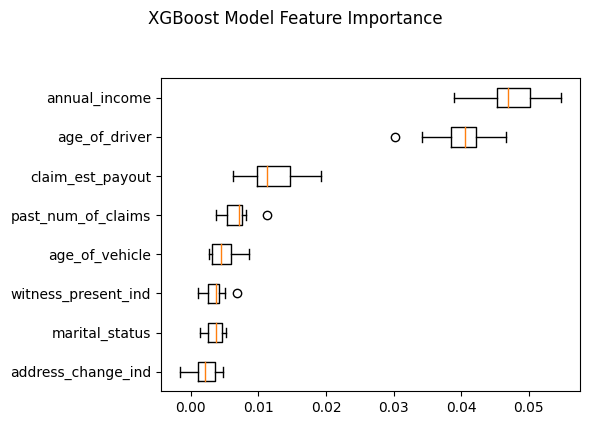

In [ ]:
# permutation importance is on X_test

from sklearn.inspection import permutation_importance # Importing Permutation Importance Class from Scikit Learn
import matplotlib.pyplot as plt
import seaborn as sns

clf = XGB

result = permutation_importance(clf, X_test2, y_test, n_repeats=15,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_test2.columns[perm_sorted_idx])
fig.suptitle('XGBoost Model Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

The top 5 variables are annual_income, age_of_driver, claim_est_payout, past_num_of_claims, and age_of_vehicle. Below I have another Permutation Importance Plot with just the 5 variables !

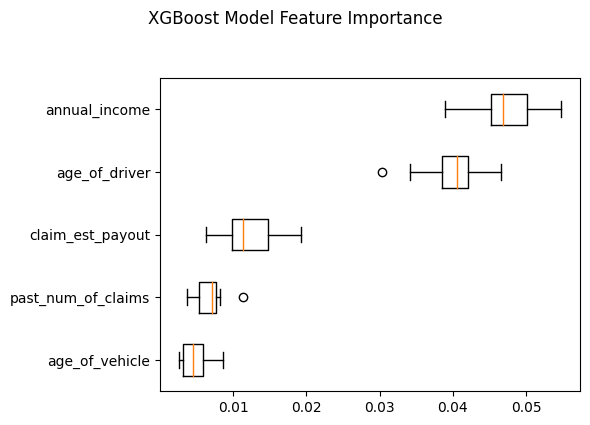

In [ ]:
# Permutation Importance for Top 5 Features on X_test

from sklearn.inspection import permutation_importance # Importing Permutation Importance Class from Scikit Learn
import matplotlib.pyplot as plt
import seaborn as sns

clf = XGB

result = permutation_importance(clf, X_test2, y_test, n_repeats=15,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx[-5:]].T, vert=False,
            labels=X_test2.columns[perm_sorted_idx[-5:]])
fig.suptitle('XGBoost Model Feature Importance', y=1.05)
fig.tight_layout()
plt.show()

## Partial Dependence Plots

In [ ]:
# partial dependence is on X_train
!pip install pulp # Importing ice and iceplot package
!pip install pycebox
from pycebox.ice import ice, ice_plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 69.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3626 sha256=135c86e0ed29dc4226f2a4dd70d9ca5f482e5dc7c1bae6398fbb385e6ee53274
  Stored in directory: /root/.cache/pip/wheels/af/57/4b/0d7bdd5b5ee35d225b01da15c62ed0ec0af10073f24a4a03ce
Successfully built pycebox


In [ ]:
train_X_df = pd.DataFrame(X_res, columns=X_res.columns) # Creating dataframe on X_train to run iceplots
train_X_df.head()

,age_of_vehicle,claim_est_payout,witness_present_ind,past_num_of_claims,address_change_ind,age_of_driver,marital_status,annual_income
0,-0.005361,0.640398,-0.557876,-0.526345,-1.155055,0.216267,0.627535,0.536427
1,-1.784453,-0.744405,-0.557876,1.581532,-1.155055,-0.728323,0.627535,-1.254793
2,-0.894907,-0.993284,-0.557876,-0.526345,0.865760,1.676088,0.627535,1.204705
3,-0.450134,-0.230689,1.802978,-0.526345,-1.155055,0.302139,0.627535,0.672304
4,1.328958,-0.095573,1.802978,1.581532,-1.155055,-0.556579,0.627535,-0.895504


In [ ]:
train_X_df.shape

(25706, 8)

### annual_income PDP plot

In [ ]:
train_X_df['annual_income'].nunique()

7752

In [ ]:
# Setting up ice plot for median_income
tmpdf_ai = ice(data=train_X_df,
            column='annual_income',
                   predict=XGB.predict,
            num_grid_points = 50)

print(np.shape(tmpdf_ai))

(30, 25706)


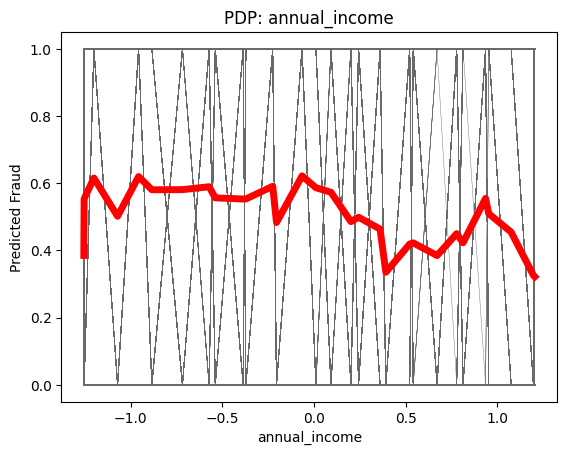

In [ ]:
# Plotting ice plot for median_income
ice_plot(tmpdf_ai, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: annual_income')
plt.ylabel('Predicted Fraud')
plt.xlabel('annual_income');
plt.show()

### age_of_driver PDP plot

In [ ]:
train_X_df['age_of_driver'].nunique()

8785

In [ ]:
# Setting up ice plot for median_income
tmpdf_ad = ice(data=train_X_df,
            column='age_of_driver',
                   predict=XGB.predict,
            num_grid_points = 50)

print(np.shape(tmpdf_ad))

(50, 25706)


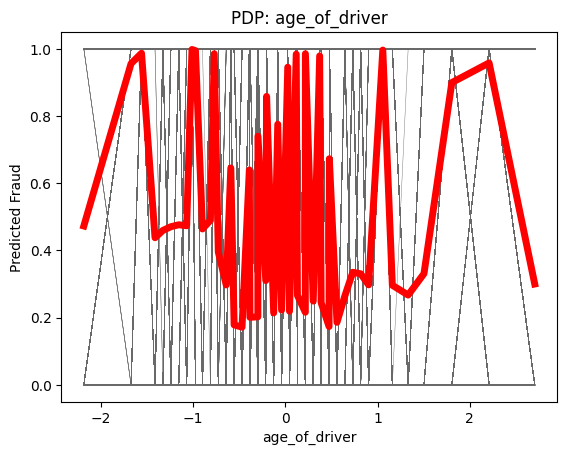

In [ ]:
# Plotting ice plot for median_income
ice_plot(tmpdf_ad, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: age_of_driver')
plt.ylabel('Predicted Fraud')
plt.xlabel('age_of_driver');
plt.show()

### claim_est_payout PDP plot

In [ ]:
train_X_df['claim_est_payout'].nunique()

25706

In [ ]:
# Setting up ice plot for median_income
tmpdf_cp = ice(data=train_X_df,
            column='claim_est_payout',
                   predict=XGB.predict,
            num_grid_points = 50)

print(np.shape(tmpdf_cp))

(50, 25706)


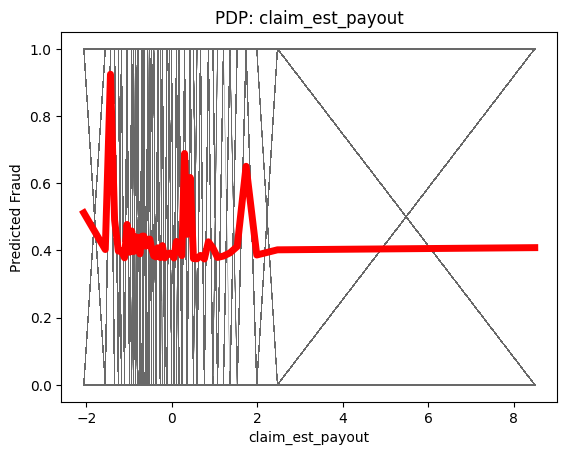

In [ ]:
# Plotting ice plot for median_income
ice_plot(tmpdf_cp, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: claim_est_payout')
plt.ylabel('Predicted Fraud')
plt.xlabel('claim_est_payout');
plt.show()

### past_num_of_claims PDP plot

In [ ]:
train_X_df['past_num_of_claims'].nunique()

334

In [ ]:
# Setting up ice plot for median_income
tmpdf_nc = ice(data=train_X_df,
            column='past_num_of_claims',
                   predict=XGB.predict,
            num_grid_points = 50)

print(np.shape(tmpdf_nc))

(7, 25706)


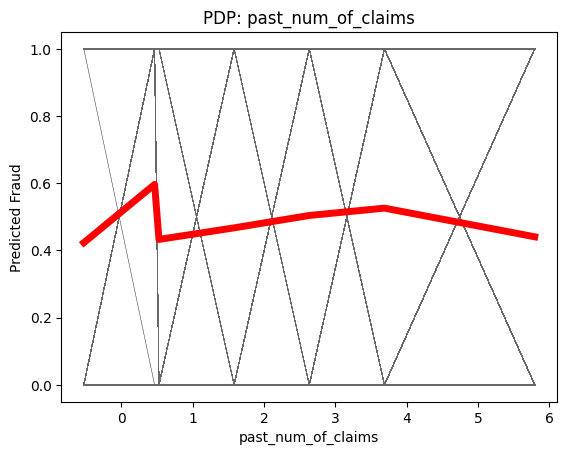

In [ ]:
# Plotting ice plot for median_income
ice_plot(tmpdf_nc, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: past_num_of_claims')
plt.ylabel('Predicted Fraud')
plt.xlabel('past_num_of_claims');
plt.show()

### age_of_vehicle PDP plot

In [ ]:
train_X_df['age_of_vehicle'].nunique()

5202

In [ ]:
# Setting up ice plot for median_income
tmpdf_av = ice(data=train_X_df,
            column='age_of_vehicle',
                   predict=XGB.predict,
            num_grid_points = 50)

print(np.shape(tmpdf_av))

(22, 25706)


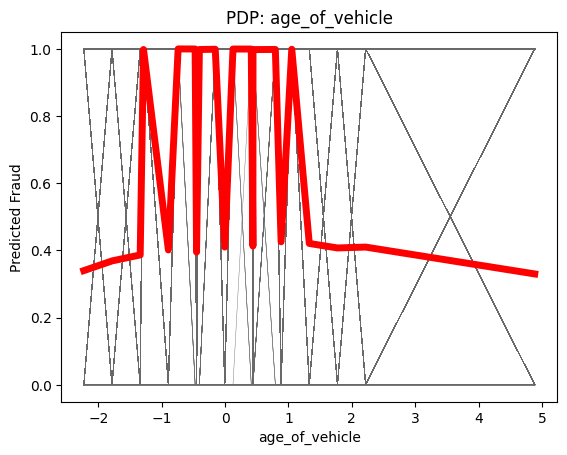

In [ ]:
# Plotting ice plot for median_income
ice_plot(tmpdf_av, c='dimgray', linewidth=0.3,
                  plot_pdp=True,
         pdp_kwargs={'linewidth': 5, 'color':'red'})
plt.title('PDP: age_of_vehicle')
plt.ylabel('Predicted Fraud')
plt.xlabel('age_of_vehicle');
plt.show()

#Use your model results and interpretability items to present what variables are most influential in causing a policy cancellation.

First and foremost, having a F-1 score of 0.79 is not the best. However, this is a real world dataset with a very imbalanced data. We are right on the cusp of the 80/20 rule, so overall not terrible! Moreover, on the test partition, our total accuracy is 82%, which is pretty decent. We have a precision of 0.33 and a recall of 0.17, these two metrics can definitely and should be drastically improved for better model predictability, especially concerning our target class - 1 (Fraud). Having said this, the Permutation Importance Plot highlighted the following 5 variables that were most important:

* annual_income:

* age_of_driver

* claim_est_payout

* past_num_of_claims

* age_of_vehicle

Annual income from the Partial Dependence plot shows a very intersting plot that we highlighted in our exploration as well. It starts at probability value of around 0.4 and picks, generally stutters in the 0.5 - 0.6 range before crashing back down. As we noted, the affluent and poor don't seem to be invovled in fraud cases, so the middle class is definitely our target group here. While still very broad, it definitely lends some insight into potential policy cancellations.


However, that is just one variable, the next variable we identified was age of the driver. Looking at the Partial Dependence plot, the middle is too noisy, so no real value can be extracted from there. However, younger and older people have a probability value that is much generally below 0.5. This means that people who are could commit fraud are generally middle-aged people. Another key statistic to keep an eye out as an insurance policy maker.

Next, looking at the estimated claim payout PDP, we clearly see 3 spikes generally on the lower of the estimated claim payout scale. This means that people that commit fraud, want to not act too suspicious and keep their payout relatively low. Therefore, insurance policy makers should definitely keep an eye out for the lower claim payouts, as this is where the fraud or con lies.

The past number of claims plot shows a similar story. A con artist would only only file a claim an average number of times, as this is standardized data. To hide in the shadows and would not continously make fraudulent claims, so insurance policy makers again should focus on this set of people.

Lastly, the age of the vehicle also shows a similar story. Generally the cars are 1 standard deviation below the mean or 1 standard deviation above the mean, where fraud occurs. So policy makers should take a look at the mean age of the cars in their policy and verify claims that fall into this bucket.

Overall, it would seem that a policy cancellation should take place if an individual falls in the middle class bucket, is middle-aged, has generally lower claim estimated payouts, an average to low number of past claims, and his/her car is around the mean age of all cars.

Having said this, as mentioned above, this model is quite flawed, when looking at the precision and recall. Of all the predictions made, only 33% are accurate and of all the actual frauds, only 17% are predicted. So further improvements need to be made to this model before it can predict more accurately!

# Conclusion

Learning From Data Exploration

* In data exploration process, we have used several different methods to identify relations and potential features amoung dataset. Our group are filtering data by reasonable criterias, and split the whole dataset to three social groups: wealthy people, middle classes and low income people. In futher analysis, we have a suprising investigation result, which is that the most of people who committing insurance fraud are come from middle class. What we learned by explorating the dataset is that Some true patterns contained in the data may contradict intuition, hence any assumptions prior to data exploration are unreliable.   

Learnings from Models/Plots


*   Through the Histogram for all variables, we gained insights into the distributions of variables, allowing us to focus on those that we believed to be strongly associated with insurance fraud. Notably, the annual income and safety_rating variables exhibited a left-skewed distribution, while Past_num_of_claims had a right-skewed distribution. Additionally, we observed contrasting distributions of "0's" and "1's" for the Witness_present and High_education_ind attributes, with witness_present having a high frequency of "0's" and the other showing the opposite pattern.

*   The Warm and Cool map highlighted a strong correlation (~.998) between annual_income and age_of_driver attributes, suggesting a relationship between these two factors in the context of detecting insurance fraud This finding indicates that higher annual incomes tend to correspond with certain age groups, potentially serving as indicators of fraudulent claims.

Learnings from using Hyperparameters:


*   By implementing Hyperparameters in Decision Classifier model, we found that tuning hyperparameters like the maximum depth of the tree (max_depth), minimum samples to split a node (min_samples_split), minimum samples required (min_samples_leaf), and the maximum number of features considered for each split (max_features) influenced the model's interpretability and performance. Using skicit learn, we were able to delve deeper into these parameters and kept altering their values to reveal the most considered features for identifying fradulent claims.

*   When hyperparameter tuning for the 5 different models, we learned that each model has its own set of specific parameters that we use to influence its performance and alter the F1. Using skicit learn, we were able to understand the different parameter types such as regularization in Logistic Regression, tree parameters in Decision Tree Classifier and Random Forests, boosting classifier parameters in Gradient Boosted Classifier, and the various structure related parameters in Neural Network models.

Class/Project Related Learnings:


*   Throughout this project, our team had hands on practice with Python and how it can be used in real-world scenarios. By applying various models and exploring different attributes of our data, we were able to gain a deeper understanding of the patterns and variables that are indicative of fraudulent claim and how an insurance company may detect this.
*   Throughout this project, we worked in a team of three, each with diverse experiences and different levels of Python familiarity. We bettered our communication tactics, and learned to foster an environment in which team members felt comftorable to ask questions, state expectations, etc. We learned to use each others strengths to drive this project to the finish line!

General Project Learnings:

* One of the major things I learned is that pandas and numpy arrays cannot take categorical variables. I had to manually switch all the categorical variables into binary or use dummy variables. This is quite interesting and different from what I was used to in JMP, however behind the scenes, I betthis is what JMP does as well.

* Secondly, I realized how difficult it really is to hit 80-90% accuracy and F-1 score when using a heavily imbalanced dataset. Even after running several iterations, it would very difficult to move that needle up by even 1 or 2 %.

* Thirdly, car insurance fraud seems to be quite difficult to predict, given this dataset represents the real world.I can imagine how many different models and time must be spent finding the most parsimonious model.Especially, given how long it took me to run just 1-2 gridsearching models.

* Fourthly, this is the first time where I have used fit.transform and then transform on the trainingand test partition respectively. Previously, in JMP, I have always explored the entire dataset and made modifications to both train and test, before splitting it. I guess in the real world this is a big red flag as it causes data leakage. I learned the importance of data leakage to come up withan accurate and truthful model!


* Lastly, not being able to drop rows was very tough. I feel that some of the values that were imputedmust have been very off the mark, causing the performance of the model to degrade. There is a very fine line between losing rows or data and imputing to get that perfect model.
















